# Processamento digital de imagens
Professor Bruno Augusto Dorta Marques

## Atividade 1 

O objetivo desta atividade é implementar operações básicas envolvendo processamento de imagens digitais. 

O conteúdo desta atividade engloba as aulas do [Capítulo 1](https://www.brunodorta.com.br/pdi/config.html) ao [Capítulo 5](https://www.brunodorta.com.br/pdi/reconstruction.html) do livro didático.

A atividade deve seguir algumas regras:
- Não utilize bibliotecas externas que não foram utilizadas durante as aulas. Todo o processamento de imagens deve ser executado em python, utilizando as bibliotecas utilizadas no livro didático.
- Sempre que possível, utilize funções do ``numpy`` para implementar as respostas.
- É permitido a criação de funções e células adicionais para resolver as questões
- Os parâmetros de entrada, e as variáveis de saída devem ser respeitadas e não podem ser alteradas.
- Não altere o nome das funções nas respostas.
- Não entregue a atividade com erros de sintaxe ou de execução. Caso não consiga resolver alguma questão, deixe a questão em branco, retornando ```None``` na devida função.
- Qualquer cópia da internet ou de outras fontes implicará na anulação da questão
- A detecção de plágio nas respostas pode anular toda a atividade.

Dicas:
- Ao final, certifique-se que todas as suas respostas estão sendo executadas corretamente, reinicie o kernel python e execute todas as células sequencialmente do início ao fim.
- Com exceção das imagens de entrada, evite utilizar outras variáveis globais (definidas fora do escopo local da função) para as suas implementações.
- É permitido e aconselhável plotar estágios intermediários das suas respostas, quando elas forem muito complexas. Utilize o plt.imshow, seguido de um plt.show para exibir suas imagens
- Caso a imagem criada esteja muito pequena para ser visualizada, utilize antes da imagem o comando ``plt.figure(figsize=(X,Y))`` onde ``X`` e ``Y`` são os tamanhos mínimos da figura.
- Para plotar imagens em escala de cinzas utilize o comando ``plt.imshow`` com o parâmetro ``cmap="gray"``, por exemplo: ``plt.imshow(imagem, cmap="gray")``
- Para converter entre os formatos ``np.float32`` e ``np.uint8``, utilize a função ``np.array.astype``
- Para copiar uma imagem, utilize a função ``np.copy()``. Isto é particularmente interessante para que você não altere a imagem de entrada.

## Dados Pessoais
Insira os seus dados pessoais logo abaixo.

O trabalho pode ser feito de forma individual ou em duplas.
Caso o trabalho seja feito individualmente, altere apenas o primeiro conjunto de variáveis (``nome_1`` e ``RA_1``).

In [1]:
import numpy as np
import cv2 as cv
import imageio as io
import matplotlib.pyplot as plt

In [2]:
nome_1 = "Edson Gomes Martinelli"
RA_1 = 11097416

nome_2 = None
RA_2 = None

# Preparando a imagem de entrada:

Carregue uma imagem de sua preferência utilizando o ``io.imread`` e converta para o espaço de cor em escalas de cinzas utilizando ```cv.cvtColor``` com o parâmetro 
``cv.COLOR_RGB2GRAY``.

**A imagem deve ser entregue junto ao ``.ipynb`` no momento de envio da atividade.**

Exemplo:

![Exemplo](imagens/ufabc_gray.png).

In [3]:
'''Insira o código para leitura (e conversão) da imagem de entrada aqui'''

entrada = None # substituta para uma entrada válida. 
entrada = io.imread('input/ufabc.png') 
entrada = cv.cvtColor(entrada, cv.COLOR_RGB2GRAY)

## Questão 1 (2.0)

### Implemente uma função para obter o negativo da imagem. 
Implemente a operação sobre a intensidade de uma imagem em escala de cinzas. \
Os valores de intensidades do negativo de uma imagem consiste nos valores complementares as intensidades originais.

**Exemplo:**

o nível de cinza com valor $0$ passa a ser convertido para valor $255$, \
o nível de cinza com valor $1$ passa a ser convertido para valor $254$ e assim por diante.

![Negativo da imagem](imagens/q1_negativo.png).

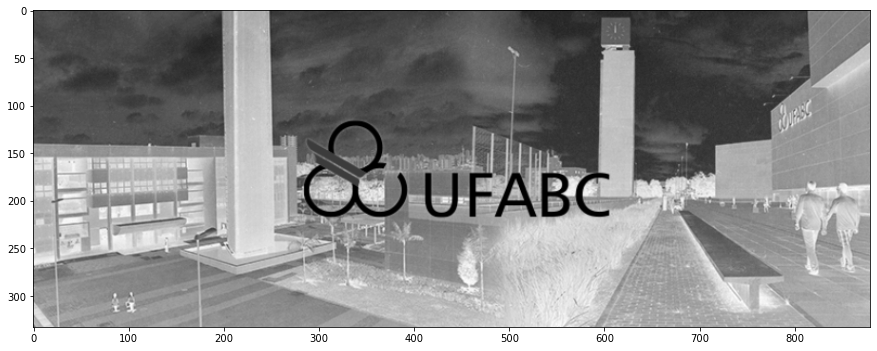

In [4]:
def q1_negativo(imagem):
    
    resultado = None
    height, width = imagem.shape[0], imagem.shape[1]
    resultado = np.zeros((height, width), dtype = np.uint8)
    for x in range(height):
        for y in range(width):
            resultado[x, y] = 255 - imagem[x, y]
    
    return resultado

negativo = q1_negativo(entrada)
plt.figure(figsize=(15,15))
plt.imshow(negativo, cmap="gray")

Utilize este espaço para escrever comentários sobre a sua resposta.

## Questão 2 (2.0)
### Implemente uma função para converter o intervalo de intensidades da imagem para o **intervalo dinâmico** $[127; 191]$

**Exemplo:** 

![Intervalo dinâmico](imagens/q2_intervalo.png).

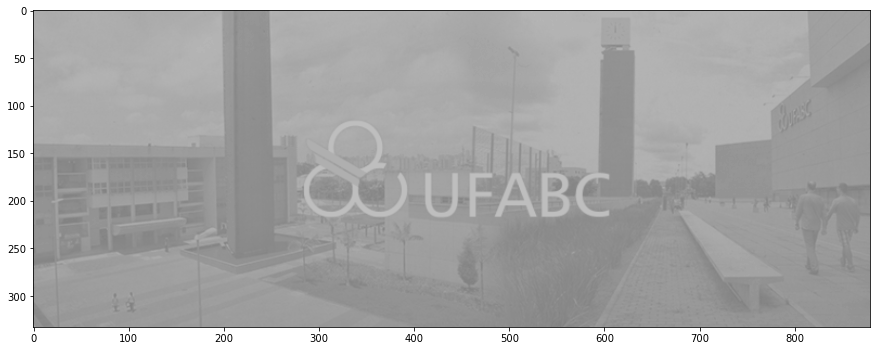

In [5]:
def q2_intervalo(imagem, intervalo=(127,191)):
    
    resultado = None
    dist_interval = intervalo[1] - intervalo[0]
    parts = 256 / dist_interval
    height, width = imagem.shape[0], imagem.shape[1]
    resultado = np.zeros((height, width), dtype = np.uint8)
    for x in range(height):
        for y in range(width):
            resultado[x, y] = int((imagem[x, y] + 1 ) / parts) + intervalo[0] - 1
    
    return resultado

intervalo = q2_intervalo(entrada)
plt.figure(figsize=(15,15))
plt.imshow(intervalo, cmap="gray", vmin=0, vmax=255)

Utilize este espaço para escrever comentários sobre a sua resposta.

## Questão 3 (2.0)
### Implemente uma função para inverter espacialmente (entrelaçar) os valores dos pixels das linhas **impares** da imagem.

Considere a primeira linha como linha $0$. \
Considere a linha $0$ como *par*. 

**Exemplo:**


os valores dos pixels da linha $0$ serão posicionados da esquerda para a direita; \
os valores dos pixels da linha $1$ serão posicionados da direita para a esquerda; \
os valores dos pixels da linha $2$ serão posicionados da esquerda para a direita; \
e assim por diante.

![Entrelaçamento](imagens/q3_invert.png) .

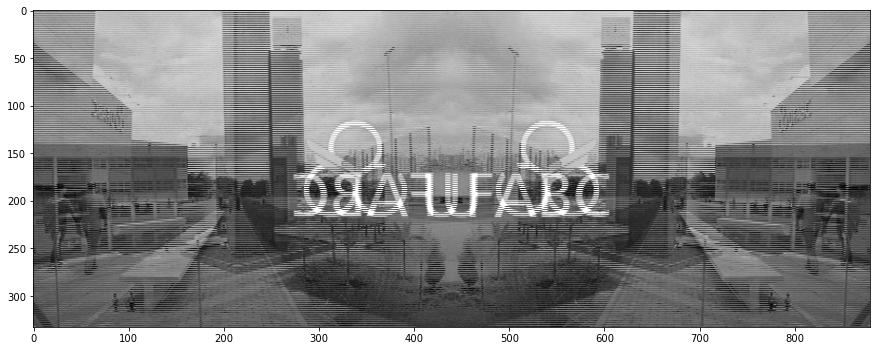

In [6]:
def q3_inverter(imagem, modo="impar"):
    resultado = None
    
    height = imagem.shape[0]
    resultado = np.copy(imagem)
    for x in range(height):
        if(x % 2 == 1):
            resultado[x] = np.flip(imagem[x])
    return resultado

invertido = q3_inverter(entrada)
plt.figure(figsize=(15,15))
plt.imshow(invertido, cmap="gray")

Utilize este espaço para escrever comentários sobre a sua resposta.

## Questão 4 (2.0)
### Implemente uma função que faça a reflexão de linhas e colunas. Primeiro faça o espelhamento das linhas da parte superior para a parte inferior da imagem. Em seguida, faça o espelhamento das colunas da parte esquerda na parte direita da imagem.


Faça primeiro a operação nas linhas. Utilizando o resultado das linhas, faça a operação nas colunas.

Sempre quando houve algum arredondamento, faça o arredondamento para baixo. \
Por exemplo, $201 / 2 = 100$. Para facilitar, você pode utilizar a divisão inteira no python ```201//2```


Teste seu algoritmo para imagens com resolução espacial *par* e *impar*.

*Exemplo:* 

![espelhamento](imagens/q4_mirror.png).

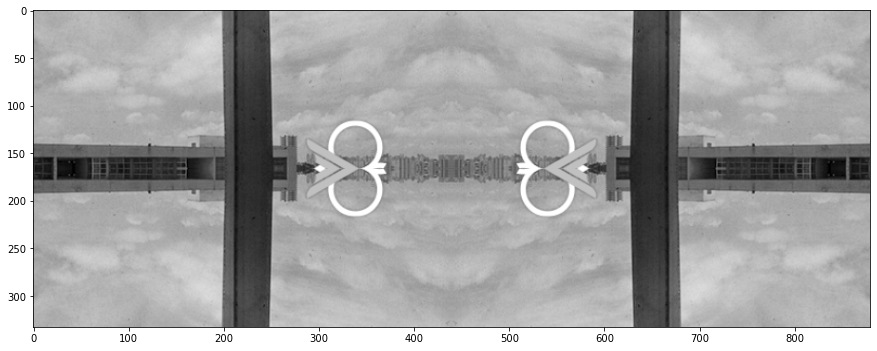

In [12]:
def q4_espelhar(imagem):
    resultado = None
    
    height, width = imagem.shape[0], imagem.shape[1]
    resultado = np.copy(imagem)
    for y in range(width // 2):
        resultado[:, width - 1 - y] = resultado[:, y]

    for x in range(height // 2):
        resultado[height - 1 - x] = resultado[x]

    return resultado

espelho = q4_espelhar(entrada)
plt.figure(figsize=(15,15))
plt.imshow(espelho, cmap="gray")

Utilize este espaço para escrever comentários sobre a sua resposta.

## Questão 5 (2.0)
### Implemente uma função que faça um mosaico a partir de uma imagem.

O mosaico deve seguir o esquema de blocos, supondo que cada bloco esteja identificado como abaixo:


|  **0** |  **1** |  **2** |  **3** |  **4** |
|:------:|:------:|:------:|:------:|:------:|
|  **5** |  **6** |  **7** |  **8** | **9** | 
| **10** | **11** | **12** | **13** | **14** |
| **15** | **16** | **17** | **18** | **19** |

a nova configuração deve respeitar a seguinte numeração dos blocos:

|  **3** |  **2** |  **12** |  **0** |  **4** |
|:------:|:------:|:------:|:------:|:------:|
| **5** | **17** |  **7** |  **8** | **15** | 
| **16** |  **11** |  **1** | **19** | **18** |
|  **9** | **6** |  **10** | **14** | **13** |


Caso a resolução da sua imagem não seja múltipla da quantidade de blocos, você pode cortar ou redimensionar a sua imagem antes de executar o algoritmo.

**Exemplo:**

![mosaico](imagens/q5_mosaic.png) .

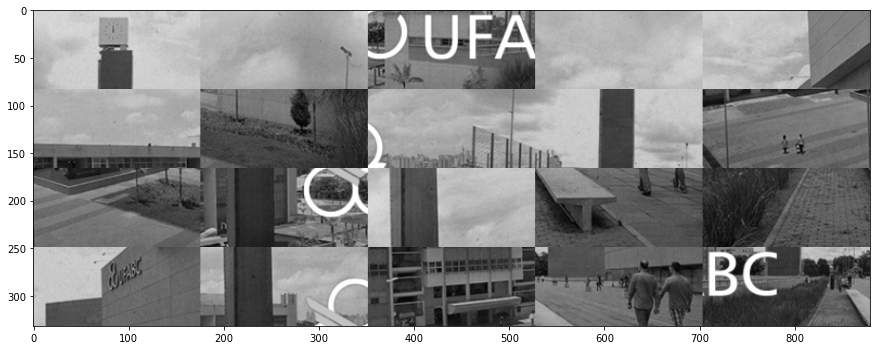

In [13]:

def q5_mosaico(imagem, num_linhas=4, num_cols=5):
    resultado = None

    resultado = cut_image(imagem, num_linhas, num_cols)
    height, width = resultado.shape[0], resultado.shape[1]
    result_backup = np.copy(resultado)
    size_x, size_y = height // num_linhas, width // num_cols
    conf = [ 3,  2, 12,  0,  4,
             5, 17,  7,  8, 15,
            16, 11,  1, 19, 18,
             9,  6, 10, 14, 13 ]
    index = 0

    for x in range(0, height, size_x):
        for y in range(0, width, size_y):
            p_x = (conf[index] // num_cols) * size_x
            p_y = (conf[index] % num_cols) * size_y
            resultado[x : x + size_x,
                      y : y + size_y] = result_backup[p_x : p_x + size_x,
                                                      p_y : p_y + size_y]
            index += 1
    return resultado

def cut_image(imagem, num_linhas, num_cols):
    height_img, width_img = imagem.shape[0], imagem.shape[1]
    extra_lines, extra_cols = (height_img % num_linhas), (width_img % num_cols)
    height, width = height_img - extra_lines, width_img - extra_cols
    result = np.copy(imagem[0 : height, 0 : width])
    return result

mosaico = q5_mosaico(entrada)

plt.figure(figsize=(15,15))
plt.imshow(mosaico, cmap="gray")

Utilize este espaço para escrever comentários sobre a sua resposta.